In [1]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
import pandas as pd 
import numpy as np

In [45]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 4s (2,706 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144865 files and d

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

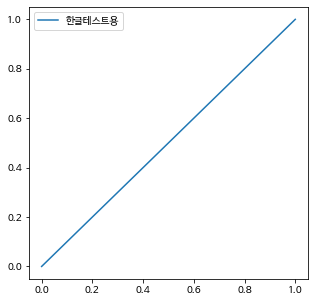

In [4]:
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [5]:
data = pd.read_excel('/content/gdrive/My Drive/real_final.xlsx')
data.head()

,Unnamed: 0,영화명,개봉일,누적관객수,평점,뉴스,경쟁 영화수,상영시간,국적,배급사,등급,개봉월,요일,주말,애니메이션,액션,드라마,코미디,범죄,멜로/로맨스,스릴러,공포,판타지,미스터리,모험,SF,가족,뮤지컬,공연,전쟁,다큐멘터리,사극,느와르,스크린수,겨울,봄,여름,가을
0,0,극한직업,20190123,16266338,9.20,358109.0,511,111,1,1,2,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1978.0,1,0,0,0
1,1,어벤져스: 엔드게임,20190424,13977602,9.50,521258.0,632,181,0,1,1,4,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2835.0,0,1,0,0
2,2,겨울왕국 2,20191121,13747792,8.95,304370.0,951,103,0,1,0,11,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2648.0,0,0,0,1
3,3,알라딘,20190523,12555894,9.42,156573.0,698,128,0,1,0,5,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1311.0,0,1,0,0
4,4,신과함께-인과 연,20180801,12276359,8.63,393626.0,763,141,1,1,1,8,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2235.0,0,0,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  630 non-null    int64  
 1   영화명         630 non-null    object 
 2   개봉일         630 non-null    int64  
 3   누적관객수       630 non-null    int64  
 4   평점          630 non-null    float64
 5   뉴스          630 non-null    float64
 6   경쟁 영화수      630 non-null    int64  
 7   상영시간        630 non-null    int64  
 8   국적          630 non-null    int64  
 9   배급사         630 non-null    int64  
 10  등급          630 non-null    int64  
 11  개봉월         630 non-null    int64  
 12  요일          630 non-null    int64  
 13  주말          630 non-null    int64  
 14  애니메이션       630 non-null    int64  
 15  액션          630 non-null    int64  
 16  드라마         630 non-null    int64  
 17  코미디         630 non-null    int64  
 18  범죄          630 non-null    int64  
 19  멜로/로맨스      630 non-null    i

In [ ]:
## 범주형 데이터 데이터 타입 변경

data['국적']=data['국적'].astype('category')
data['배급사']=data['배급사'].astype('category')
data['등급']=data['등급'].astype('category')
data['개봉월']=data['개봉월'].astype('category')
data['요일']=data['요일'].astype('category')
data['주말']=data['주말'].astype('category')
data['애니메이션']=data['애니메이션'].astype('category')
data['액션']=data['액션'].astype('category')
data['드라마']=data['드라마'].astype('category')
data['코미디']=data['코미디'].astype('category')
data['범죄']=data['범죄'].astype('category')
data['멜로/로맨스']=data['멜로/로맨스'].astype('category')
data['스릴러']=data['스릴러'].astype('category')
data['공포']=data['공포'].astype('category')
data['판타지']=data['판타지'].astype('category')
data['미스터리']=data['미스터리'].astype('category')
data['모험']=data['모험'].astype('category')
data['SF']=data['SF'].astype('category')
data['가족']=data['가족'].astype('category')
data['뮤지컬']=data['뮤지컬'].astype('category')
data['공연']=data['공연'].astype('category')  
data['전쟁']=data['전쟁'].astype('category')  
data['다큐멘터리']=data['다큐멘터리'].astype('category')  
data['사극']=data['사극'].astype('category')
data['느와르']=data['느와르'].astype('category')  
data['겨울']=data['겨울'].astype('category')  
data['봄']=data['봄'].astype('category')  
data['여름']=data['여름'].astype('category')  
data['가을']=data['가을'].astype('category')  

In [7]:
input_var=['평점', '뉴스', '경쟁 영화수', '상영시간', '국적',
       '배급사', '등급', '개봉월', '요일', '주말', '애니메이션', '액션', '드라마', '코미디', '범죄',
       '멜로/로맨스', '스릴러', '공포', '판타지', '미스터리', '모험', 'SF', '가족', '뮤지컬', '공연',
       '전쟁', '다큐멘터리', '사극', '느와르', '스크린수', '겨울', '봄', '여름', '가을']
target=['누적관객수']

In [8]:
train=data[input_var]
test=np.log1p(data[target])

In [9]:
#model
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

#processing
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

#validate
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [10]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state= 10)

## RandomForestRegressor

In [11]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
kf=KFold(n_splits=5,random_state=0,shuffle=True)
print(kf)

KFold(n_splits=5, random_state=0, shuffle=True)


In [12]:
pradication=[]
for train,test in kf.split(X_train):
    train_data=X_train.iloc[train]
    train_prad=y_train.iloc[train]
    rf.fit(train_data,train_prad)
    test_prad=rf.predict(X_train.iloc[test])
    pradication.append(test_prad)

In [13]:
pradication=np.concatenate(pradication,axis=0)

In [14]:
## train 예측
rf_mse=mean_squared_error(y_train,pradication)
rf_rmse=np.sqrt(rf_mse)
rf_rmse

2.5828698720521035

In [15]:
rf_mae=mean_absolute_error(y_train,pradication)
rf_mae

2.0944038624662653

In [16]:
## test 예측
rf.fit(X_train,y_train)
prediction = rf.predict(X_test)
rf_mse=mean_squared_error(y_test,prediction)
rf_rmse=np.sqrt(rf_mse)
rf_rmse

0.8508828877134685

In [17]:
rf_mae=mean_absolute_error(y_test, prediction)
rf_mae

0.6303587773167659

## LightGBM

In [18]:
import lightgbm as lgb
def get_oof_lgbm(params, train_data, test_data, target_data, num_round, early_round, verbose_round, N_SPLITS=5, random_state=0):

    FOLDs=KFold(n_splits=N_SPLITS, shuffle=True,random_state=0)

    oof = np.zeros(len(train_data))
    predictions = np.zeros(len(test_data))
    #predictions=[]

    features_lgb = list(train_data.columns)
    feature_importance_df = pd.DataFrame()

    for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train_data)):
        trn_data = lgb.Dataset(train_data.iloc[trn_idx], label=target_data.iloc[trn_idx])
        val_data = lgb.Dataset(train_data.iloc[val_idx], label=target_data.iloc[val_idx])

        print("LGB " + str(fold_) + "-" * 50)
        num_round = num_round
        clf = lgb.train(params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=verbose_round, 
                        early_stopping_rounds = early_round)
        oof[val_idx] = clf.predict(train_data.iloc[val_idx], num_iteration=clf.best_iteration)

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = features_lgb
        fold_importance_df["importance"] = clf.feature_importance()
        fold_importance_df["fold"] = fold_ + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        predictions += clf.predict(test_data, num_iteration=clf.best_iteration) / FOLDs.n_splits
        #predictions.append(clf.predict(test_data, num_iteration=clf.best_iteration))
    return oof, predictions, feature_importance_df,params

In [19]:
lgb_params={"objective":"regression",
           "metric":"rmse",
           "alpha":0.08,
           "gamma":0.06,
           "eta":0.04,
           "silent":True}
a,b,c,d=get_oof_lgbm(lgb_params,X_train,X_test,y_train,num_round=100000, early_round=500, verbose_round=600, N_SPLITS=5, random_state=0)

predictions_lgbm=b
pre_lgb=a

LGB 0--------------------------------------------------
Training until validation scores don't improve for 500 rounds.
[600]	training's rmse: 0.133009	valid_1's rmse: 0.747125
Early stopping, best iteration is:
[177]	training's rmse: 0.356008	valid_1's rmse: 0.719057
LGB 1--------------------------------------------------
Training until validation scores don't improve for 500 rounds.
[600]	training's rmse: 0.123958	valid_1's rmse: 0.773156
Early stopping, best iteration is:
[597]	training's rmse: 0.124657	valid_1's rmse: 0.772986
LGB 2--------------------------------------------------
Training until validation scores don't improve for 500 rounds.
[600]	training's rmse: 0.128521	valid_1's rmse: 0.796876
Early stopping, best iteration is:
[176]	training's rmse: 0.354645	valid_1's rmse: 0.793415
LGB 3--------------------------------------------------
Training until validation scores don't improve for 500 rounds.
[600]	training's rmse: 0.118874	valid_1's rmse: 0.85562
Early stopping, best 

In [20]:
##train 예측
lgb_mse=mean_squared_error(y_train, a)
lgb_rmse=np.sqrt(lgb_mse)
lgb_rmse

0.7761568946616482

In [21]:
lgb_mae=mean_absolute_error(y_train, a)
lgb_mae

0.6108657616211968

In [22]:
## test 예측
lgb_mse=mean_squared_error(y_test, b)
lgb_rmse=np.sqrt(lgb_mse)
lgb_rmse

0.7817628116679178

In [23]:
lgb_mae=mean_absolute_error(y_test, b)
lgb_mae

0.5720973682189974

In [24]:
lgb_FI=c.sort_values(by=["fold", "importance"], ascending=[False, False]).groupby("fold").head(10)

In [25]:
a=lgb_FI.groupby("feature",as_index=False).mean().sort_values(by=["importance"],ascending=False)
a

,feature,importance,fold
8,스크린수,811.8,3.0
2,경쟁 영화수,805.8,3.0
4,뉴스,771.8,3.0
11,평점,726.0,3.0
7,상영시간,547.6,3.0
1,개봉월,327.0,3.0
5,등급,113.4,3.0
9,애니메이션,91.0,2.0
10,요일,82.2,3.0
3,국적,56.6,3.0


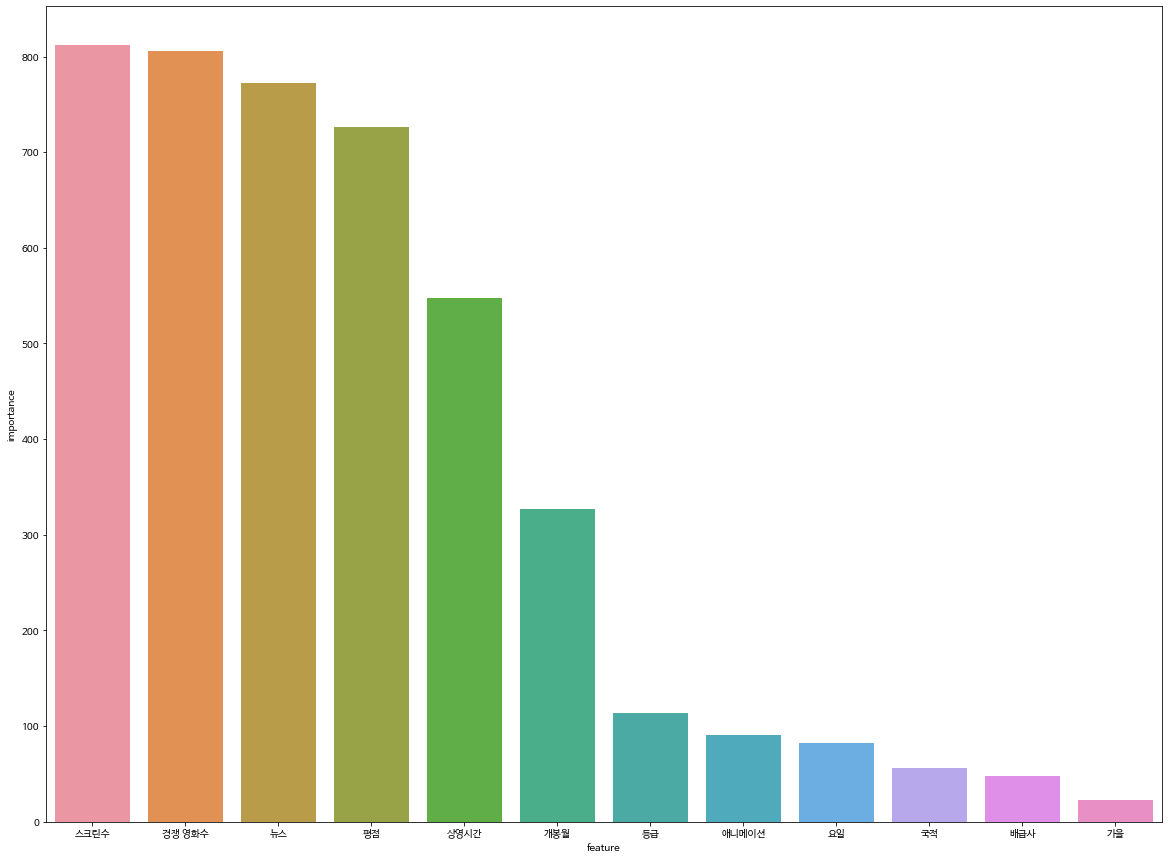

In [26]:
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:white')
sns.barplot(y='importance',x='feature', data=a)
plt.show()

## XGBoost

In [27]:
import xgboost as xgb
def get_oof_xgb(params, train_data, test_data, target_data, num_round, early_round, verbose_round, N_SPLITS=5, random_state=0):

    FOLDs=KFold(n_splits=N_SPLITS, shuffle=True,random_state=0)

    oof = np.zeros(len(train_data))
    predictions = np.zeros(len(test_data))
    #predictions=[]

    feature_importance_df = pd.DataFrame()

    best_iters = []
    for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train_data)):
        trn_data = xgb.DMatrix(train_data.iloc[trn_idx], label=target_data.iloc[trn_idx])
        val_data = xgb.DMatrix(train_data.iloc[val_idx], label=target_data.iloc[val_idx])
        print("xgb " + str(fold_) + "-" * 50)

        watchlist = [(trn_data, 'train'), (val_data, 'valid')]
        print("xgb " + str(fold_) + "-" * 50)
        num_round = num_round
        xgb_model = xgb.train(params, trn_data, num_round, watchlist, 
                              early_stopping_rounds=early_round, verbose_eval=verbose_round)
        oof[val_idx] = xgb_model.predict(xgb.DMatrix(train_data.iloc[val_idx]), 
                                             ntree_limit=xgb_model.best_ntree_limit)

        predictions += xgb_model.predict(xgb.DMatrix(test_data), 
                                             ntree_limit=xgb_model.best_ntree_limit) / FOLDs.n_splits
        #predictions.append(xgb_model.predict(xgb.DMatrix(test_data),ntree_limit=xgb_model.best_ntree_limit))
        
        fold_importance_df = pd.DataFrame([xgb_model.get_score()]).T.reset_index()
        fold_importance_df.columns = ['feature', 'importance']
        fold_importance_df["fold"] = fold_ + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        best_iters.append(xgb_model.best_ntree_limit)
    return oof, predictions, feature_importance_df, np.mean(best_iters)

In [28]:
xgb_params={"objective":"reg:squarederror",
           "eval_metric":"rmse",
           "alpha":0.08,
           "gamma":0.06,
           "eta":0.04}
a,b,c,d=get_oof_xgb(xgb_params, X_train,X_test,y_train, num_round=100000, early_round=400, verbose_round=500, N_SPLITS=5, random_state=0)

predictions_xgb=b
pre_xgb=a

xgb 0--------------------------------------------------
xgb 0--------------------------------------------------
[0]	train-rmse:12.0136	valid-rmse:12.0815
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 400 rounds.
[500]	train-rmse:0.152472	valid-rmse:0.675694
Stopping. Best iteration:
[259]	train-rmse:0.153522	valid-rmse:0.675184

xgb 1--------------------------------------------------
xgb 1--------------------------------------------------
[0]	train-rmse:12.0953	valid-rmse:11.7377
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 400 rounds.
[500]	train-rmse:0.159216	valid-rmse:0.777236
Stopping. Best iteration:
[240]	train-rmse:0.159227	valid-rmse:0.777081

xgb 2--------------------------------------------------
xgb 2--------------------------------------------------
[0]	train-rmse:11.9924	valid-rmse:12.1586
Multiple

In [29]:
## train 예측
xgb_mse=mean_squared_error(y_train, a)
xgb_rmse=np.sqrt(xgb_mse)
xgb_rmse

0.7759194617225108

In [30]:
xgb_mae=mean_absolute_error(y_train, a)
xgb_mae

0.6078935262200138

In [31]:
## test 예측
xgb_mse=mean_squared_error(y_test, b)
xgb_rmse=np.sqrt(xgb_mse)
xgb_rmse

0.8155210205988436

In [32]:
xgb_mae=mean_absolute_error(y_test, b)
xgb_mae

0.6021896477180999

In [33]:
xgb_FI=c.sort_values(by=["fold", "importance"], ascending=[False, False]).groupby("fold").head(10)

In [34]:
a_1=xgb_FI.groupby("feature",as_index=False).mean().sort_values(by=["importance"],ascending=False)
a_1

,feature,importance,fold
1,경쟁 영화수,793.6,3.0
8,스크린수,743.4,3.0
13,평점,719.8,3.0
3,뉴스,714.4,3.0
7,상영시간,483.6,3.0
0,개봉월,274.6,3.0
10,요일,148.8,3.0
5,등급,120.2,3.0
4,드라마,80.6,3.0
11,코미디,69.0,2.0


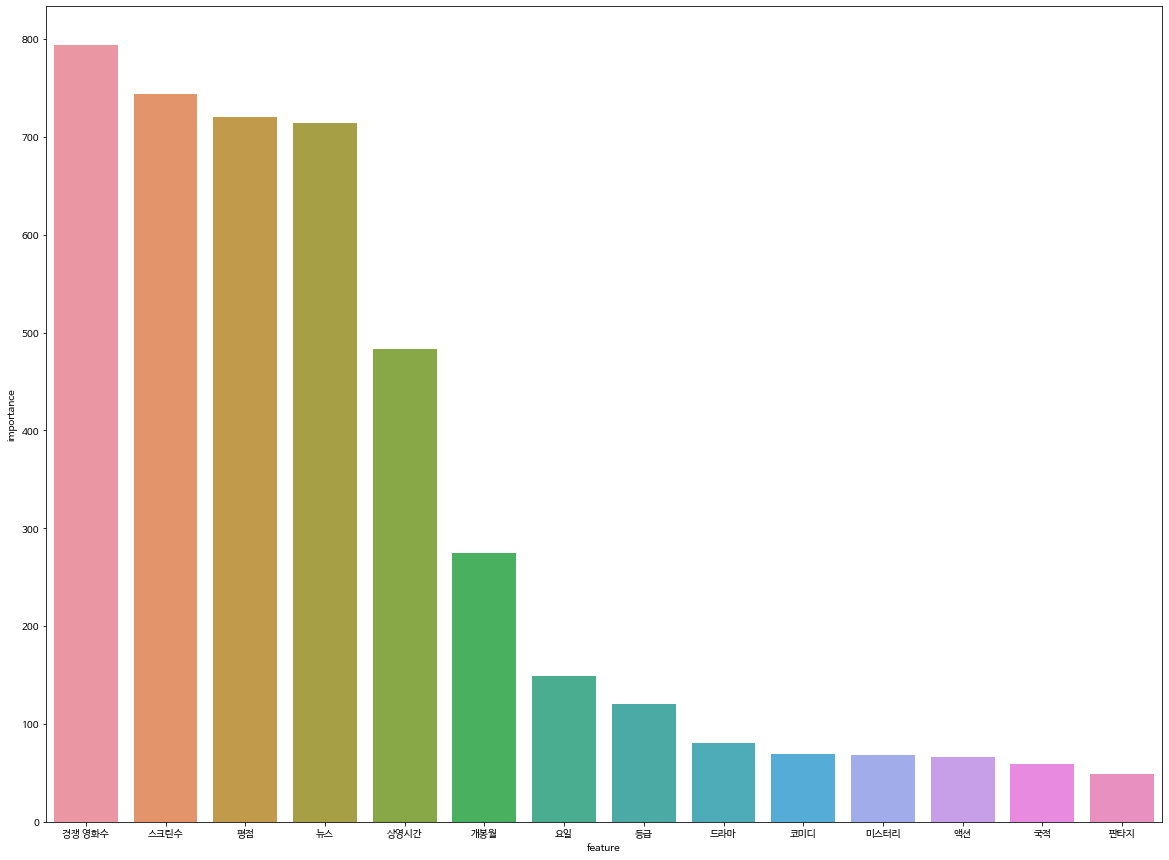

In [35]:
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:white')
sns.barplot(y='importance',x='feature', data=a_1)
plt.show()

## Mean_Ensemble

In [36]:
## train 예측
p=(pre_xgb+pre_lgb)/2
mae=mean_absolute_error(y_train, p)
mae

0.5942206460382145

In [37]:
mse=mean_squared_error(y_train, p)
rmse=np.sqrt(mse)
rmse

0.7590318705272081

In [38]:
## test 예측
p=(predictions_xgb+predictions_lgbm)/2
mae=mean_absolute_error(y_test, p)
mae

0.5811216549329

In [39]:
mse=mean_squared_error(y_test, p)
rmse=np.sqrt(mse)
rmse

0.7897566091321877

## Classification, 300만 기준

In [40]:
def profit(x):
  if x>3000000:
    return 0    #흥행 성공
  else: 
    return 1    #흥행 실패

data['profit'] = data['누적관객수'].apply(profit)
#data['profit'] = data['profit'].astype('category')

In [41]:
data['profit'].value_counts()

1    519
0    111
Name: profit, dtype: int64

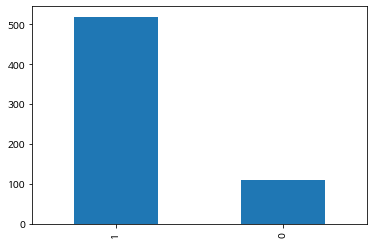

In [42]:
data['profit'].value_counts().plot(kind='bar')
plt.show()

In [43]:
input_var=['평점', '뉴스', '경쟁 영화수', '상영시간', '국적',
       '배급사', '등급', '개봉월', '요일', '주말', '애니메이션', '액션', '드라마', '코미디', '범죄',
       '멜로/로맨스', '스릴러', '공포', '판타지', '미스터리', '모험', 'SF', '가족', '뮤지컬', '공연',
       '전쟁', '다큐멘터리', '사극', '느와르', '스크린수', '겨울', '봄', '여름', '가을']
target=['profit']

In [44]:
train=data[input_var]
test=data[target]

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state= 42)

In [45]:
y_train['profit'].value_counts()

1    416
0     88
Name: profit, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_resampled,y_resampled = smote.fit_sample(X_train,y_train)
x_test=np.array(X_test)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_resampled.shape, y_resampled.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_resampled).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (504, 34) (504, 1)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (832, 34) (832,)
SMOTE 적용 후 레이블 값 분포: 
 1    416
0    416
dtype: int64


In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

#모델링
def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    metrics(y_test,pred)
    return pred
#평가 지표
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred,average='macro')
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1,roc_score,recall))
    #X_resampled
    #y_resampled

## LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()
kf=KFold(n_splits=5,random_state=0,shuffle=True)
print(kf)

KFold(n_splits=5, random_state=0, shuffle=True)


In [49]:
pradication=[]
for train,test in kf.split(X_train):
    train_data=X_train.iloc[train]
    train_prad=y_train.iloc[train]
    lr.fit(train_data,train_prad)
    test_prad=lr.predict(X_train.iloc[test])
    pradication.append(test_prad)

In [50]:
pradication=np.concatenate(pradication,axis=0)
pradication[pradication>=0.5]=1
pradication[pradication<0.5]=0

In [51]:
## train 예측
metrics(y_train,pradication)

정확도 : 0.74, 정밀도 : 0.83, 재현율 : 0.86
f1-score : 0.84, auc : 0.50


In [52]:
## test 예측
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
metrics(y_test,prediction)

정확도 : 0.88, 정밀도 : 0.92, 재현율 : 0.94
f1-score : 0.93, auc : 0.78


In [53]:
## Sampling 데이터 셋 사용
pradication=[]
for train,test in kf.split(X_resampled):
    train_data=X_resampled[train]
    train_prad=y_resampled[train]
    lr.fit(train_data,train_prad)
    test_prad=lr.predict(X_resampled[test])
    pradication.append(test_prad)

In [54]:
pradication=np.concatenate(pradication,axis=0)
pradication[pradication>=0.5]=1
pradication[pradication<0.5]=0

In [55]:
## train 예측
metrics(y_resampled,pradication)

정확도 : 0.53, 정밀도 : 0.53, 재현율 : 0.51
f1-score : 0.52, auc : 0.53


In [56]:
## test 예측
lr.fit(X_resampled,y_resampled)
prediction = lr.predict(X_test)
metrics(y_test,prediction)

정확도 : 0.87, 정밀도 : 0.96, 재현율 : 0.87
f1-score : 0.91, auc : 0.85


## GradientBoostingClassifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3118602206821891, loss='exponential',
             max_depth=18, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=0.8853376596095855,
             min_weight_fraction_leaf=0.0, n_estimators=125,
             n_iter_no_change=None, presort='auto', random_state=0,
              subsample=0.9527916569719446, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

modeling(GBC,X_train,X_test, y_train,y_test)
print("샘플링 이후")
GBC_pred=modeling(GBC,X_resampled,X_test, y_resampled,y_test)

정확도 : 0.91, 정밀도 : 0.93, 재현율 : 0.96
f1-score : 0.95, auc : 0.83
샘플링 이후
정확도 : 0.90, 정밀도 : 0.92, 재현율 : 0.96
f1-score : 0.94, auc : 0.78


## XGBoost

In [58]:
## 샘플링 이전
import xgboost as xgb
def get_oof_xgb(params, train_data, test_data, target_data, num_round, early_round, verbose_round, N_SPLITS=5, random_state=0):

    FOLDs=KFold(n_splits=N_SPLITS, shuffle=True,random_state=0)

    oof = np.zeros(len(train_data))
    predictions = np.zeros(len(test_data))
    #predictions=[]

    feature_importance_df = pd.DataFrame()

    best_iters = []
    for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train_data)):
        trn_data = xgb.DMatrix(train_data.iloc[trn_idx], label=target_data.iloc[trn_idx])
        val_data = xgb.DMatrix(train_data.iloc[val_idx], label=target_data.iloc[val_idx])
        print("xgb " + str(fold_) + "-" * 50)

        watchlist = [(trn_data, 'train'), (val_data, 'valid')]
        print("xgb " + str(fold_) + "-" * 50)
        num_round = num_round
        xgb_model = xgb.train(params, trn_data, num_round, watchlist, 
                              early_stopping_rounds=early_round, verbose_eval=verbose_round)
        oof[val_idx] = xgb_model.predict(xgb.DMatrix(train_data.iloc[val_idx]), 
                                             ntree_limit=xgb_model.best_ntree_limit)

        predictions += xgb_model.predict(xgb.DMatrix(test_data), 
                                             ntree_limit=xgb_model.best_ntree_limit) / FOLDs.n_splits
        #predictions.append(xgb_model.predict(xgb.DMatrix(test_data),ntree_limit=xgb_model.best_ntree_limit))
        
        fold_importance_df = pd.DataFrame([xgb_model.get_score()]).T.reset_index()
        fold_importance_df.columns = ['feature', 'importance']
        fold_importance_df["fold"] = fold_ + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        best_iters.append(xgb_model.best_ntree_limit)
    return oof, predictions, feature_importance_df, np.mean(best_iters)

In [59]:
xgb_params={"objective":"binary:logistic",
           "eval_metric":"error",
           "alpha":0.08,
           "gamma":0.06,
           "eta":0.04}
a,b,c,d=get_oof_xgb(xgb_params, X_train,X_test,y_train, num_round=100000, early_round=400, verbose_round=500, N_SPLITS=5, random_state=0)

predictions_xgb=b

xgb 0--------------------------------------------------
xgb 0--------------------------------------------------
[0]	train-error:0.057072	valid-error:0.118812
Multiple eval metrics have been passed: 'valid-error' will be used for early stopping.

Will train until valid-error hasn't improved in 400 rounds.
[500]	train-error:0	valid-error:0.069307
Stopping. Best iteration:
[229]	train-error:0	valid-error:0.069307

xgb 1--------------------------------------------------
xgb 1--------------------------------------------------
[0]	train-error:0.059553	valid-error:0.089109
Multiple eval metrics have been passed: 'valid-error' will be used for early stopping.

Will train until valid-error hasn't improved in 400 rounds.
Stopping. Best iteration:
[0]	train-error:0.059553	valid-error:0.089109

xgb 2--------------------------------------------------
xgb 2--------------------------------------------------
[0]	train-error:0.064516	valid-error:0.069307
Multiple eval metrics have been passed: 'valid-e

In [60]:
## train 예측
y_hat = np.where(a < 0.5, 0, 1)
metrics(y_train,y_hat)

정확도 : 0.93, 정밀도 : 0.94, 재현율 : 0.98
f1-score : 0.96, auc : 0.84


In [61]:
## test 예측
y_hat = np.where(predictions_xgb < 0.5, 0, 1)
print("샘플링 이전")  
metrics(y_test,y_hat)

샘플링 이전
정확도 : 0.91, 정밀도 : 0.93, 재현율 : 0.96
f1-score : 0.95, auc : 0.83


In [62]:
xgb_FI=c.sort_values(by=["fold", "importance"], ascending=[False, False]).groupby("fold").head(10)

In [63]:
a=xgb_FI.groupby("feature",as_index=False).mean().sort_values(by=["importance"],ascending=False)
a

,feature,importance,fold
7,스크린수,556.200000,3.0
3,뉴스,541.400000,3.0
1,경쟁 영화수,519.000000,3.0
11,평점,487.400000,3.0
6,상영시간,336.800000,3.0
0,개봉월,234.400000,3.0
4,드라마,102.000000,3.0
10,요일,86.666667,2.0
2,국적,78.200000,3.0
8,액션,68.000000,5.0


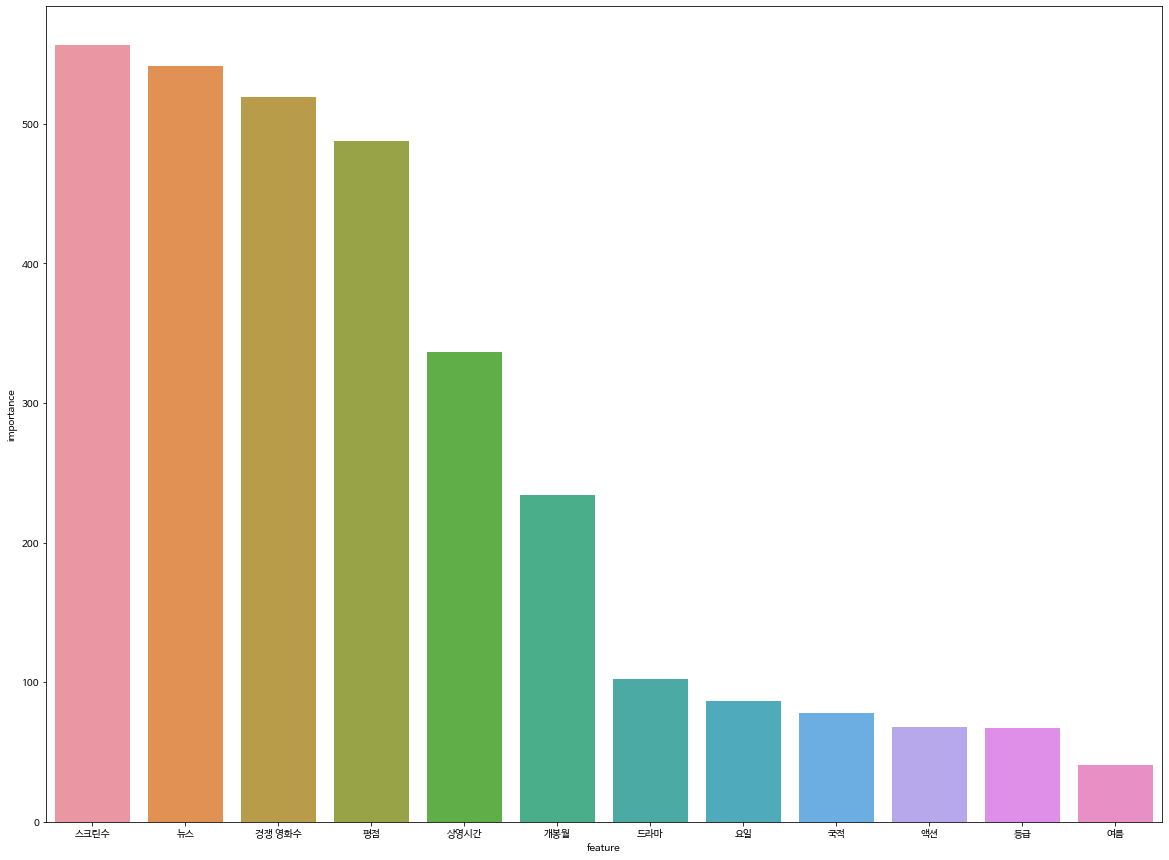

In [64]:
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:white')
sns.barplot(y='importance',x='feature', data=a)
plt.show()

In [65]:
## 샘플링 이후
import xgboost as xgb
def get_oof_xgb(params, train_data, test_data, target_data, num_round, early_round, verbose_round, N_SPLITS=5, random_state=0):

    FOLDs=KFold(n_splits=N_SPLITS, shuffle=True,random_state=0)

    oof = np.zeros(len(train_data))
    predictions = np.zeros(len(test_data))
    #predictions=[]

    feature_importance_df = pd.DataFrame()

    best_iters = []
    for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train_data)):
        trn_data = xgb.DMatrix(train_data[trn_idx], label=target_data[trn_idx])
        val_data = xgb.DMatrix(train_data[val_idx], label=target_data[val_idx])
        print("xgb " + str(fold_) + "-" * 50)

        watchlist = [(trn_data, 'train'), (val_data, 'valid')]
        print("xgb " + str(fold_) + "-" * 50)
        num_round = num_round
        xgb_model = xgb.train(params, trn_data, num_round, watchlist, 
                              early_stopping_rounds=early_round, verbose_eval=verbose_round)
        oof[val_idx] = xgb_model.predict(xgb.DMatrix(train_data[val_idx]), 
                                             ntree_limit=xgb_model.best_ntree_limit)

        predictions += xgb_model.predict(xgb.DMatrix(test_data), 
                                             ntree_limit=xgb_model.best_ntree_limit) / FOLDs.n_splits
        #predictions.append(xgb_model.predict(xgb.DMatrix(test_data),ntree_limit=xgb_model.best_ntree_limit))
        
        fold_importance_df = pd.DataFrame([xgb_model.get_score()]).T.reset_index()
        fold_importance_df.columns = ['feature', 'importance']
        fold_importance_df["fold"] = fold_ + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        best_iters.append(xgb_model.best_ntree_limit)
    return oof, predictions, feature_importance_df, np.mean(best_iters)

In [66]:
xgb_params={"objective":"binary:logistic",
           "eval_metric":"error",
           "alpha":0.08,
           "gamma":0.06,
           "eta":0.04}
a,b,c,d=get_oof_xgb(xgb_params, X_resampled,x_test,y_resampled, num_round=100000, early_round=400, verbose_round=500, N_SPLITS=5, random_state=0)

predictions_xgb=b

xgb 0--------------------------------------------------
xgb 0--------------------------------------------------
[0]	train-error:0.052632	valid-error:0.11976
Multiple eval metrics have been passed: 'valid-error' will be used for early stopping.

Will train until valid-error hasn't improved in 400 rounds.
[500]	train-error:0	valid-error:0.02994
Stopping. Best iteration:
[214]	train-error:0	valid-error:0.02994

xgb 1--------------------------------------------------
xgb 1--------------------------------------------------
[0]	train-error:0.058647	valid-error:0.101796
Multiple eval metrics have been passed: 'valid-error' will be used for early stopping.

Will train until valid-error hasn't improved in 400 rounds.
Stopping. Best iteration:
[82]	train-error:0.01203	valid-error:0.035928

xgb 2--------------------------------------------------
xgb 2--------------------------------------------------
[0]	train-error:0.045045	valid-error:0.10241
Multiple eval metrics have been passed: 'valid-error

In [67]:
## train 예측
y_hat = np.where(a < 0.5, 0, 1)
metrics(y_resampled,y_hat)

정확도 : 0.96, 정밀도 : 0.97, 재현율 : 0.96
f1-score : 0.96, auc : 0.96


In [68]:
## test 예측
y_hat = np.where(predictions_xgb < 0.5, 0, 1)  
print("샘플링 이후")  
metrics(y_test,y_hat)

샘플링 이후
정확도 : 0.90, 정밀도 : 0.93, 재현율 : 0.95
f1-score : 0.94, auc : 0.82


In [69]:
xgb_FI=c.sort_values(by=["fold", "importance"], ascending=[False, False]).groupby("fold").head(10)

In [70]:
a=xgb_FI.groupby("feature",as_index=False).mean().sort_values(by=["importance"],ascending=False)
a

,feature,importance,fold
1,f1,627.8,3.0
4,f2,568.8,3.0
5,f29,555.4,3.0
0,f0,463.8,3.0
9,f7,328.4,3.0
6,f3,308.4,3.0
3,f12,162.0,3.0
10,f8,155.8,3.0
8,f6,149.5,2.5
7,f4,142.8,3.0


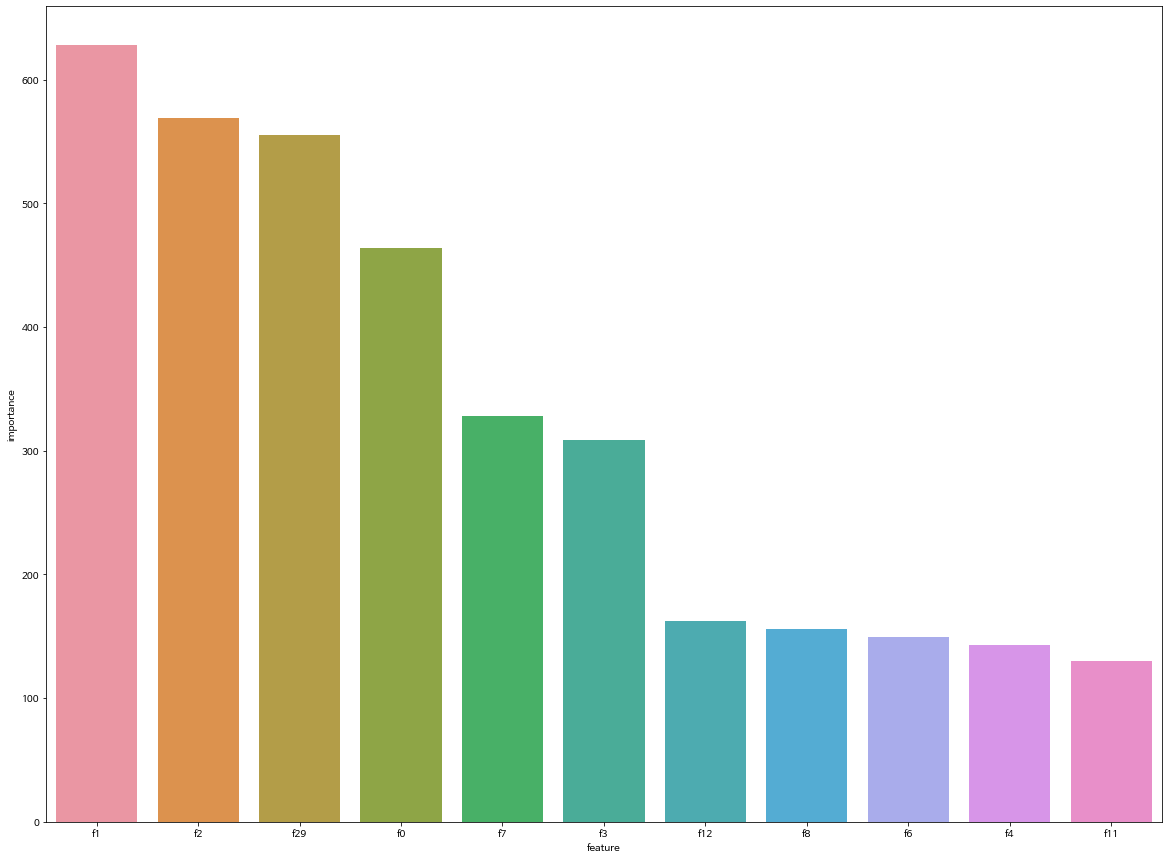

In [71]:
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:white')
sns.barplot(y='importance',x='feature', data=a)
plt.show()

## LightGBM

In [72]:
## 샘플링 이전
import lightgbm as lgb
def get_oof_lgbm(params, train_data, test_data, target_data, num_round, early_round, verbose_round, N_SPLITS=5, random_state=0):

    FOLDs=KFold(n_splits=N_SPLITS, shuffle=True,random_state=0)

    oof = np.zeros(len(train_data))
    predictions = np.zeros(len(test_data))
    #predictions=[]

    features_lgb = list(train_data.columns)
    feature_importance_df = pd.DataFrame()

    for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train_data)):
        trn_data = lgb.Dataset(train_data.iloc[trn_idx], label=target_data.iloc[trn_idx])
        val_data = lgb.Dataset(train_data.iloc[val_idx], label=target_data.iloc[val_idx])

        print("LGB " + str(fold_) + "-" * 50)
        num_round = num_round
        clf = lgb.train(params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=verbose_round, 
                        early_stopping_rounds = early_round)
        oof[val_idx] = clf.predict(train_data.iloc[val_idx], num_iteration=clf.best_iteration)

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = features_lgb
        fold_importance_df["importance"] = clf.feature_importance()
        fold_importance_df["fold"] = fold_ + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        predictions += clf.predict(test_data, num_iteration=clf.best_iteration) / FOLDs.n_splits
        #predictions.append(clf.predict(test_data, num_iteration=clf.best_iteration))
    return oof, predictions, feature_importance_df,params

In [73]:
lgb_params={"objective":"binary",
           "metric":"auc",
           "alpha":0.08,
           "gamma":0.06,
           "eta":0.04,
           "silent":True}
a,b,c,d=get_oof_lgbm(lgb_params,X_train,X_test,y_train,num_round=100000, early_round=40, verbose_round=600, N_SPLITS=5, random_state=0)

predictions_lgbm1=b

LGB 0--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[46]	training's auc: 0.992279	valid_1's auc: 0.932073
LGB 1--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[78]	training's auc: 0.997063	valid_1's auc: 0.914794
LGB 2--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[91]	training's auc: 0.997154	valid_1's auc: 0.980769
LGB 3--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[6]	training's auc: 0.963665	valid_1's auc: 0.994048
LGB 4--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[69]	training's auc:

In [74]:
## train 예측
y_hat = np.where(a < 0.5, 0, 1)
metrics(y_train,y_hat)

정확도 : 0.89, 정밀도 : 0.90, 재현율 : 0.98
f1-score : 0.94, auc : 0.73


In [75]:
## test 예측
y_hat = np.where(b < 0.5, 0, 1)  
print("샘플링 이전")
metrics(y_test,y_hat)

샘플링 이전
정확도 : 0.90, 정밀도 : 0.91, 재현율 : 0.97
f1-score : 0.94, auc : 0.77


In [76]:
lgb_FI=c.sort_values(by=["fold", "importance"], ascending=[False, False]).groupby("fold").head(10)

In [77]:
a=lgb_FI.groupby("feature",as_index=False).mean().sort_values(by=["importance"],ascending=False)
a

,feature,importance,fold
5,뉴스,196.200000,3.0
10,스크린수,179.000000,3.0
3,경쟁 영화수,154.600000,3.0
14,평점,117.200000,3.0
9,상영시간,66.400000,3.0
1,개봉월,46.000000,3.0
0,가을,28.000000,3.0
11,애니메이션,27.000000,1.0
4,국적,18.200000,3.0
2,겨울,17.000000,2.0


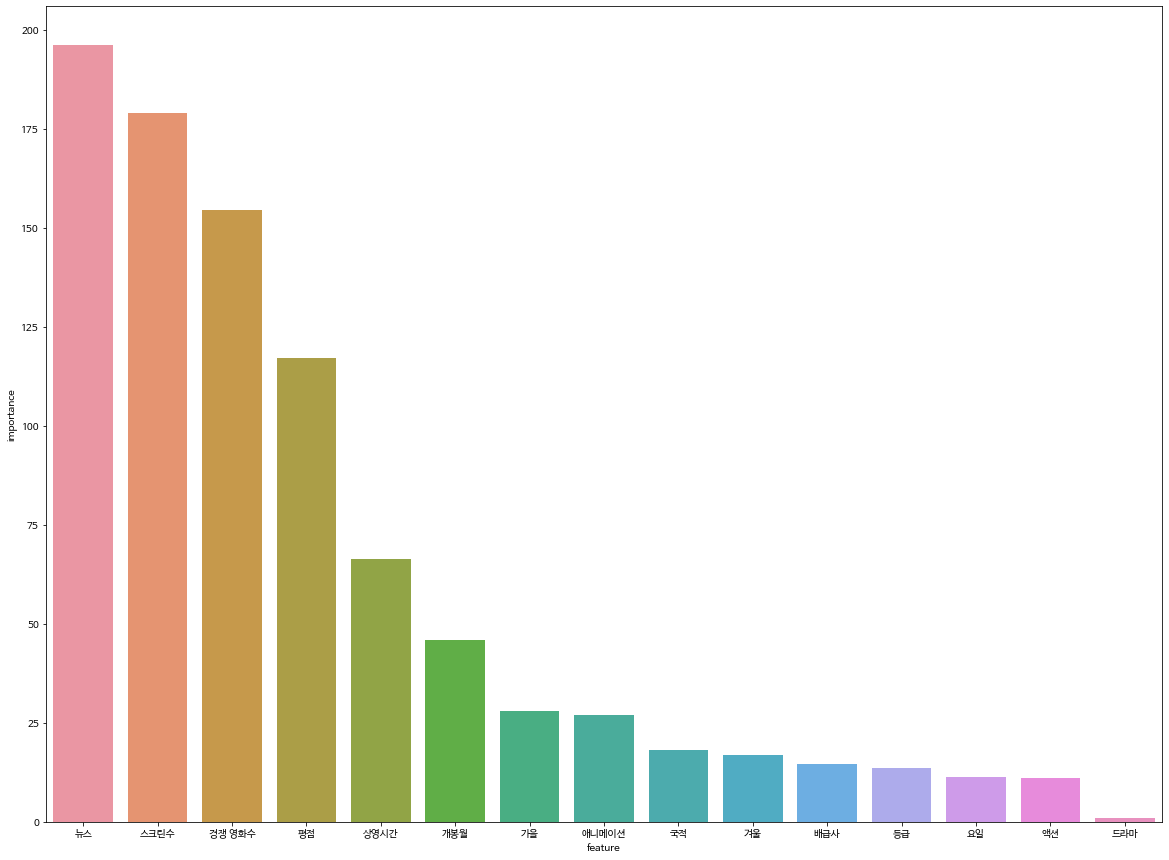

In [78]:
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:white')
sns.barplot(y='importance',x='feature', data=a)
plt.show()

In [79]:
## 샘플링 이후
import lightgbm as lgb
def get_oof_lgbm(params,train,train_data, test_data, target_data, num_round, early_round, verbose_round, N_SPLITS=5, random_state=0):

    FOLDs=KFold(n_splits=N_SPLITS, shuffle=True,random_state=0)

    oof = np.zeros(len(train_data))
    predictions = np.zeros(len(test_data))
    #predictions=[]

    features_lgb = list(train.columns)
    feature_importance_df = pd.DataFrame()

    for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train_data)):
        trn_data = lgb.Dataset(train_data[trn_idx], label=target_data[trn_idx])
        val_data = lgb.Dataset(train_data[val_idx], label=target_data[val_idx])

        print("LGB " + str(fold_) + "-" * 50)
        num_round = num_round
        clf = lgb.train(params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=verbose_round, 
                        early_stopping_rounds = early_round)
        oof[val_idx] = clf.predict(train_data[val_idx], num_iteration=clf.best_iteration)

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = features_lgb
        fold_importance_df["importance"] = clf.feature_importance()
        fold_importance_df["fold"] = fold_ + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        predictions += clf.predict(test_data, num_iteration=clf.best_iteration) / FOLDs.n_splits
        #predictions.append(clf.predict(test_data, num_iteration=clf.best_iteration))
    return oof, predictions, feature_importance_df,params

In [80]:
lgb_params={"objective":"binary",
           "metric":"auc",
           "alpha":0.08,
           "gamma":0.06,
           "eta":0.04,
           "silent":True}
a,b,c,d=get_oof_lgbm(lgb_params,X_train,X_resampled,X_test,y_resampled,num_round=100000, early_round=40, verbose_round=600, N_SPLITS=5, random_state=0)

predictions_lgbm2=b

LGB 0--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[40]	training's auc: 0.998354	valid_1's auc: 0.984362
LGB 1--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[127]	training's auc: 1	valid_1's auc: 0.986838
LGB 2--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[109]	training's auc: 0.999964	valid_1's auc: 0.991424
LGB 3--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[119]	training's auc: 1	valid_1's auc: 0.9875
LGB 4--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[106]	training's auc: 1	valid_1'

In [81]:
## train 예측
y_hat = np.where(a < 0.5, 0, 1)
metrics(y_resampled,y_hat)

정확도 : 0.95, 정밀도 : 0.97, 재현율 : 0.94
f1-score : 0.95, auc : 0.95


In [82]:
## test 예측
y_hat = np.where(b < 0.5, 0, 1)  
print("샘플링 이후")
metrics(y_test,y_hat)

샘플링 이후
정확도 : 0.90, 정밀도 : 0.93, 재현율 : 0.96
f1-score : 0.94, auc : 0.81


In [83]:
lgb_FI=c.sort_values(by=["fold", "importance"], ascending=[False, False]).groupby("fold").head(10)

In [84]:
a=lgb_FI.groupby("feature",as_index=False).mean().sort_values(by=["importance"],ascending=False)
a

,feature,importance,fold
5,뉴스,457.400000,3.000000
9,스크린수,431.800000,3.000000
12,평점,359.400000,3.000000
3,경쟁 영화수,310.800000,3.000000
8,상영시간,199.000000,3.000000
1,개봉월,161.800000,3.000000
7,등급,118.000000,3.500000
2,겨울,80.000000,2.333333
6,드라마,75.000000,3.500000
10,액션,74.666667,4.000000


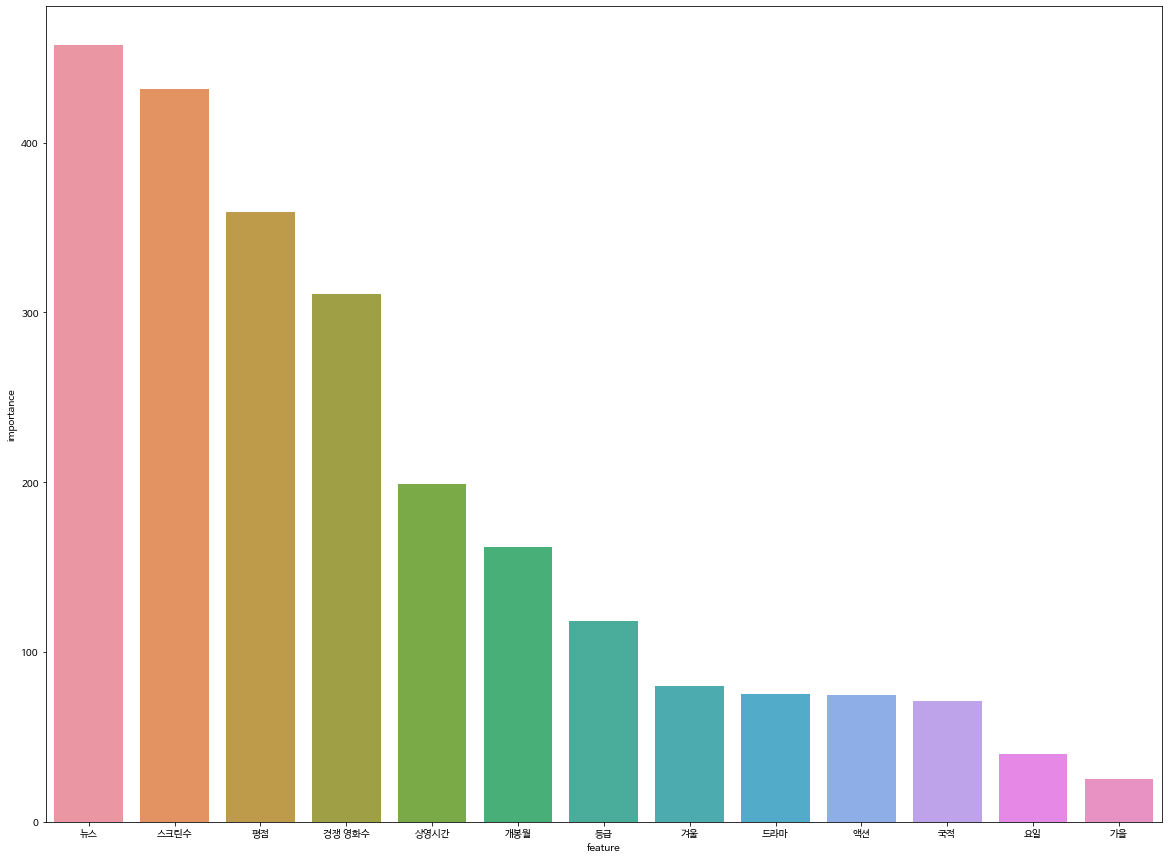

In [85]:
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:white')
sns.barplot(y='importance',x='feature', data=a)
plt.show()

In [86]:
from sklearn.metrics import confusion_matrix

cf1 = confusion_matrix(y_test, np.where(predictions_lgbm1 < 0.5, 0, 1))
cf = confusion_matrix(y_test, np.where(predictions_lgbm2 < 0.5, 0, 1))
print(cf1)
print("샘플링 이후")
print(cf)

[[ 13  10]
 [  3 100]]
샘플링 이후
[[15  8]
 [ 4 99]]


## Classification, 500만 기준

In [87]:
def profit(x):
  if x>5000000:
    return 0    #흥행 성공
  else: 
    return 1    #흥행 실패

data['profit'] = data['누적관객수'].apply(profit)
#data['profit'] = data['profit'].astype('category')

In [88]:
data['profit'].value_counts()

1    564
0     66
Name: profit, dtype: int64

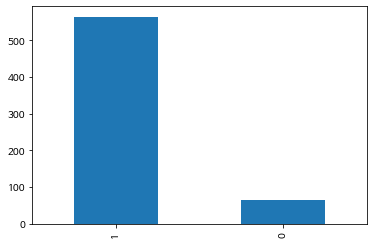

In [89]:
data['profit'].value_counts().plot(kind='bar')
plt.show()

In [90]:
input_var=['평점', '뉴스', '경쟁 영화수', '상영시간', '국적',
       '배급사', '등급', '개봉월', '요일', '주말', '애니메이션', '액션', '드라마', '코미디', '범죄',
       '멜로/로맨스', '스릴러', '공포', '판타지', '미스터리', '모험', 'SF', '가족', '뮤지컬', '공연',
       '전쟁', '다큐멘터리', '사극', '느와르', '스크린수', '겨울', '봄', '여름', '가을']
target=['profit']

In [91]:
train=data[input_var]
test=data[target]

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state= 42)

In [92]:
y_train['profit'].value_counts()

1    452
0     52
Name: profit, dtype: int64

In [93]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_resampled,y_resampled = smote.fit_sample(X_train,y_train)
x_test=np.array(X_test)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_resampled.shape, y_resampled.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_resampled).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (504, 34) (504, 1)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (904, 34) (904,)
SMOTE 적용 후 레이블 값 분포: 
 1    452
0    452
dtype: int64


## LogisticRegression

In [94]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
kf=KFold(n_splits=5,random_state=0,shuffle=True)
print(kf)

KFold(n_splits=5, random_state=0, shuffle=True)


In [95]:
pradication=[]
for train,test in kf.split(X_train):
    train_data=X_train.iloc[train]
    train_prad=y_train.iloc[train]
    lr.fit(train_data,train_prad)
    test_prad=lr.predict(X_train.iloc[test])
    pradication.append(test_prad)

In [96]:
pradication=np.concatenate(pradication,axis=0)
pradication[pradication>=0.5]=1
pradication[pradication<0.5]=0

In [97]:
## train 예측
metrics(y_train,pradication)

정확도 : 0.85, 정밀도 : 0.90, 재현율 : 0.94
f1-score : 0.92, auc : 0.51


In [98]:
## test 예측
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
metrics(y_test,prediction)

정확도 : 0.93, 정밀도 : 0.94, 재현율 : 0.98
f1-score : 0.96, auc : 0.74


In [99]:
## 샘플링 이후
pradication=[]
for train,test in kf.split(X_resampled):
    train_data=X_resampled[train]
    train_prad=y_resampled[train]
    lr.fit(train_data,train_prad)
    test_prad=lr.predict(X_resampled[test])
    pradication.append(test_prad)

In [100]:
pradication=np.concatenate(pradication,axis=0)
pradication[pradication>=0.5]=1
pradication[pradication<0.5]=0

In [101]:
## train 예측
metrics(y_resampled,pradication)

정확도 : 0.55, 정밀도 : 0.55, 재현율 : 0.51
f1-score : 0.53, auc : 0.55


In [102]:
## test 예측
lr.fit(X_resampled,y_resampled)
prediction1 = lr.predict(X_test)
metrics(y_test,prediction1)

정확도 : 0.84, 정밀도 : 0.98, 재현율 : 0.84
f1-score : 0.90, auc : 0.85


In [103]:
from sklearn.metrics import confusion_matrix

cf1 = confusion_matrix(y_test, prediction)
cf = confusion_matrix(y_test,prediction1)
print(cf1)
print("샘플링 이후")
print(cf)

[[  7   7]
 [  2 110]]
샘플링 이후
[[12  2]
 [18 94]]


## GradientBoostingClassifier

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3118602206821891, loss='exponential',
             max_depth=18, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=0.8853376596095855,
             min_weight_fraction_leaf=0.0, n_estimators=125,
             n_iter_no_change=None, presort='auto', random_state=0,
              subsample=0.9527916569719446, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

modeling(GBC,X_train,X_test, y_train,y_test)
print("샘플링 이후")
GBC_pred=modeling(GBC,X_resampled,X_test, y_resampled,y_test)

정확도 : 0.92, 정밀도 : 0.94, 재현율 : 0.97
f1-score : 0.96, auc : 0.74
샘플링 이후
정확도 : 0.93, 정밀도 : 0.96, 재현율 : 0.96
f1-score : 0.96, auc : 0.80


## XGBoost

In [105]:
## 샘플링 이전
import xgboost as xgb
def get_oof_xgb(params, train_data, test_data, target_data, num_round, early_round, verbose_round, N_SPLITS=5, random_state=0):

    FOLDs=KFold(n_splits=N_SPLITS, shuffle=True,random_state=0)

    oof = np.zeros(len(train_data))
    predictions = np.zeros(len(test_data))
    #predictions=[]

    feature_importance_df = pd.DataFrame()

    best_iters = []
    for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train_data)):
        trn_data = xgb.DMatrix(train_data.iloc[trn_idx], label=target_data.iloc[trn_idx])
        val_data = xgb.DMatrix(train_data.iloc[val_idx], label=target_data.iloc[val_idx])
        print("xgb " + str(fold_) + "-" * 50)

        watchlist = [(trn_data, 'train'), (val_data, 'valid')]
        print("xgb " + str(fold_) + "-" * 50)
        num_round = num_round
        xgb_model = xgb.train(params, trn_data, num_round, watchlist, 
                              early_stopping_rounds=early_round, verbose_eval=verbose_round)
        oof[val_idx] = xgb_model.predict(xgb.DMatrix(train_data.iloc[val_idx]), 
                                             ntree_limit=xgb_model.best_ntree_limit)

        predictions += xgb_model.predict(xgb.DMatrix(test_data), 
                                             ntree_limit=xgb_model.best_ntree_limit) / FOLDs.n_splits
        #predictions.append(xgb_model.predict(xgb.DMatrix(test_data),ntree_limit=xgb_model.best_ntree_limit))
        
        fold_importance_df = pd.DataFrame([xgb_model.get_score()]).T.reset_index()
        fold_importance_df.columns = ['feature', 'importance']
        fold_importance_df["fold"] = fold_ + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        best_iters.append(xgb_model.best_ntree_limit)
    return oof, predictions, feature_importance_df, np.mean(best_iters)

In [106]:
xgb_params={"objective":"binary:logistic",
           "eval_metric":"error",
           "alpha":0.08,
           "gamma":0.06,
           "eta":0.04}
a,b,c,d=get_oof_xgb(xgb_params, X_train,X_test,y_train, num_round=100000, early_round=400, verbose_round=500, N_SPLITS=5, random_state=0)

predictions_xgb=b

xgb 0--------------------------------------------------
xgb 0--------------------------------------------------
[0]	train-error:0.039702	valid-error:0.118812
Multiple eval metrics have been passed: 'valid-error' will be used for early stopping.

Will train until valid-error hasn't improved in 400 rounds.
[500]	train-error:0	valid-error:0.069307
Stopping. Best iteration:
[425]	train-error:0	valid-error:0.069307

xgb 1--------------------------------------------------
xgb 1--------------------------------------------------
[0]	train-error:0.042184	valid-error:0.049505
Multiple eval metrics have been passed: 'valid-error' will be used for early stopping.

Will train until valid-error hasn't improved in 400 rounds.
Stopping. Best iteration:
[37]	train-error:0.022333	valid-error:0.029703

xgb 2--------------------------------------------------
xgb 2--------------------------------------------------
[0]	train-error:0.039702	valid-error:0.039604
Multiple eval metrics have been passed: 'valid-

In [107]:
## train 예측
y_hat = np.where(a < 0.5, 0, 1)
metrics(y_train,y_hat)

정확도 : 0.93, 정밀도 : 0.95, 재현율 : 0.98
f1-score : 0.96, auc : 0.77


In [108]:
## test 예측
y_hat = np.where(predictions_xgb < 0.5, 0, 1)
print("샘플링 이전")  
metrics(y_test,y_hat)

샘플링 이전
정확도 : 0.92, 정밀도 : 0.94, 재현율 : 0.97
f1-score : 0.96, auc : 0.74


In [109]:
xgb_FI=c.sort_values(by=["fold", "importance"], ascending=[False, False]).groupby("fold").head(10)

In [110]:
a=xgb_FI.groupby("feature",as_index=False).mean().sort_values(by=["importance"],ascending=False)
a

,feature,importance,fold
5,뉴스,541.8,3.0
9,스크린수,373.2,3.0
8,상영시간,368.4,3.0
13,평점,343.0,3.0
3,경쟁 영화수,341.0,3.0
1,개봉월,185.8,3.0
10,액션,136.6,3.0
4,국적,77.8,3.0
7,등급,59.5,3.5
11,여름,52.0,3.0


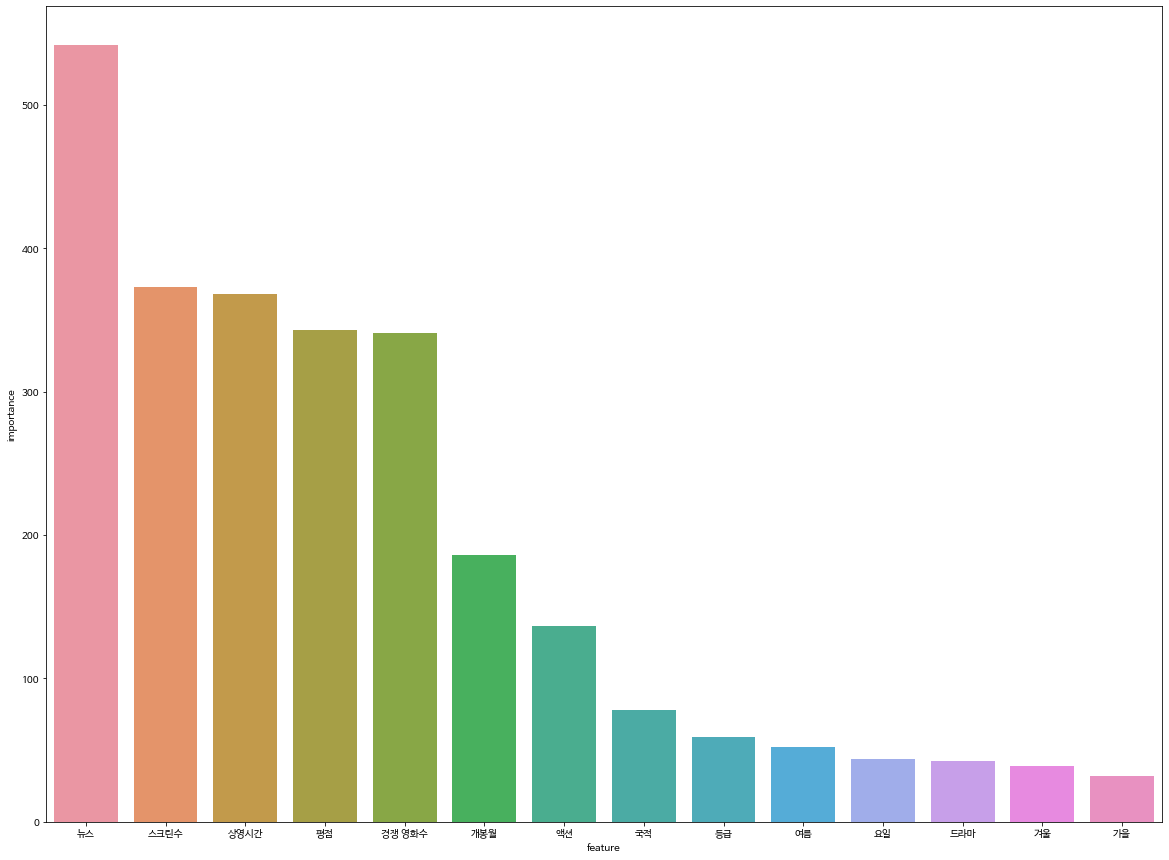

In [111]:
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:white')
sns.barplot(y='importance',x='feature', data=a)
plt.show()

In [112]:
## 샘플링 이후
import xgboost as xgb
def get_oof_xgb(params, train_data, test_data, target_data, num_round, early_round, verbose_round, N_SPLITS=5, random_state=0):

    FOLDs=KFold(n_splits=N_SPLITS, shuffle=True,random_state=0)

    oof = np.zeros(len(train_data))
    predictions = np.zeros(len(test_data))
    #predictions=[]

    feature_importance_df = pd.DataFrame()

    best_iters = []
    for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train_data)):
        trn_data = xgb.DMatrix(train_data[trn_idx], label=target_data[trn_idx])
        val_data = xgb.DMatrix(train_data[val_idx], label=target_data[val_idx])
        print("xgb " + str(fold_) + "-" * 50)

        watchlist = [(trn_data, 'train'), (val_data, 'valid')]
        print("xgb " + str(fold_) + "-" * 50)
        num_round = num_round
        xgb_model = xgb.train(params, trn_data, num_round, watchlist, 
                              early_stopping_rounds=early_round, verbose_eval=verbose_round)
        oof[val_idx] = xgb_model.predict(xgb.DMatrix(train_data[val_idx]), 
                                             ntree_limit=xgb_model.best_ntree_limit)

        predictions += xgb_model.predict(xgb.DMatrix(test_data), 
                                             ntree_limit=xgb_model.best_ntree_limit) / FOLDs.n_splits
        #predictions.append(xgb_model.predict(xgb.DMatrix(test_data),ntree_limit=xgb_model.best_ntree_limit))
        
        fold_importance_df = pd.DataFrame([xgb_model.get_score()]).T.reset_index()
        fold_importance_df.columns = ['feature', 'importance']
        fold_importance_df["fold"] = fold_ + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        best_iters.append(xgb_model.best_ntree_limit)
    return oof, predictions, feature_importance_df, np.mean(best_iters)

In [113]:
xgb_params={"objective":"binary:logistic",
           "eval_metric":"error",
           "alpha":0.08,
           "gamma":0.06,
           "eta":0.04}
a,b,c,d=get_oof_xgb(xgb_params, X_resampled,x_test,y_resampled, num_round=100000, early_round=400, verbose_round=500, N_SPLITS=5, random_state=0)

predictions_xgb=b

xgb 0--------------------------------------------------
xgb 0--------------------------------------------------
[0]	train-error:0.042877	valid-error:0.060773
Multiple eval metrics have been passed: 'valid-error' will be used for early stopping.

Will train until valid-error hasn't improved in 400 rounds.
Stopping. Best iteration:
[83]	train-error:0.006916	valid-error:0.038674

xgb 1--------------------------------------------------
xgb 1--------------------------------------------------
[0]	train-error:0.045643	valid-error:0.077348
Multiple eval metrics have been passed: 'valid-error' will be used for early stopping.

Will train until valid-error hasn't improved in 400 rounds.
Stopping. Best iteration:
[69]	train-error:0.008299	valid-error:0.022099

xgb 2--------------------------------------------------
xgb 2--------------------------------------------------
[0]	train-error:0.053942	valid-error:0.093923
Multiple eval metrics have been passed: 'valid-error' will be used for early stopp

In [114]:
## train 예측
y_hat = np.where(a < 0.5, 0, 1)
metrics(y_resampled,y_hat)

정확도 : 0.97, 정밀도 : 0.99, 재현율 : 0.96
f1-score : 0.97, auc : 0.97


In [115]:
## test 예측
y_hat = np.where(predictions_xgb < 0.5, 0, 1)  
print("샘플링 이후")  
metrics(y_test,y_hat)

샘플링 이후
정확도 : 0.92, 정밀도 : 0.96, 재현율 : 0.96
f1-score : 0.96, auc : 0.80


In [116]:
xgb_FI=c.sort_values(by=["fold", "importance"], ascending=[False, False]).groupby("fold").head(10)

In [117]:
a=xgb_FI.groupby("feature",as_index=False).mean().sort_values(by=["importance"],ascending=False)
a

,feature,importance,fold
1,f1,572.6,3.0
6,f3,395.6,3.0
5,f29,387.8,3.0
4,f2,343.4,3.0
0,f0,330.4,3.0
2,f11,242.2,3.0
11,f7,200.4,3.0
9,f4,196.4,3.0
10,f6,138.6,3.0
8,f33,130.0,3.0


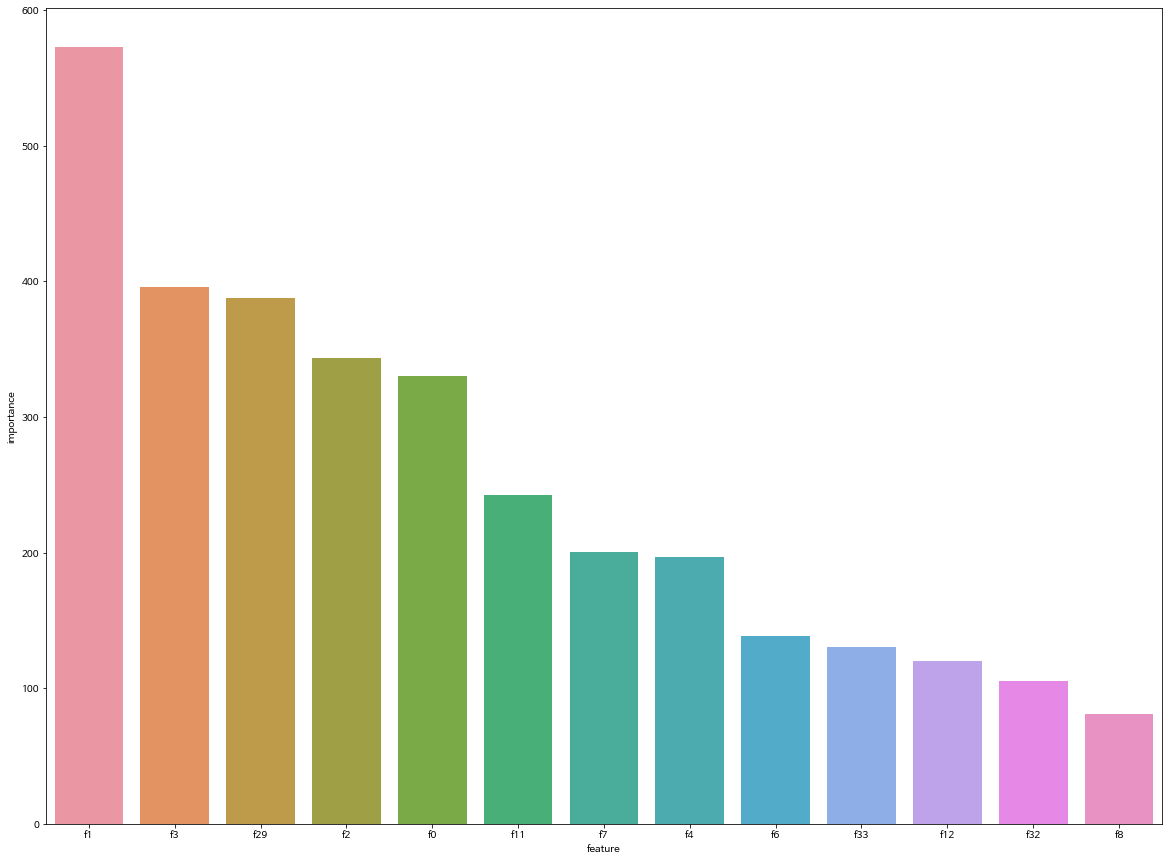

In [118]:
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:white')
sns.barplot(y='importance',x='feature', data=a)
plt.show()

## LightGBM

In [119]:
## 샘플링 이전
import lightgbm as lgb
def get_oof_lgbm(params, train_data, test_data, target_data, num_round, early_round, verbose_round, N_SPLITS=5, random_state=0):

    FOLDs=KFold(n_splits=N_SPLITS, shuffle=True,random_state=0)

    oof = np.zeros(len(train_data))
    predictions = np.zeros(len(test_data))
    #predictions=[]

    features_lgb = list(train_data.columns)
    feature_importance_df = pd.DataFrame()

    for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train_data)):
        trn_data = lgb.Dataset(train_data.iloc[trn_idx], label=target_data.iloc[trn_idx])
        val_data = lgb.Dataset(train_data.iloc[val_idx], label=target_data.iloc[val_idx])

        print("LGB " + str(fold_) + "-" * 50)
        num_round = num_round
        clf = lgb.train(params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=verbose_round, 
                        early_stopping_rounds = early_round)
        oof[val_idx] = clf.predict(train_data.iloc[val_idx], num_iteration=clf.best_iteration)

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = features_lgb
        fold_importance_df["importance"] = clf.feature_importance()
        fold_importance_df["fold"] = fold_ + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        predictions += clf.predict(test_data, num_iteration=clf.best_iteration) / FOLDs.n_splits
        #predictions.append(clf.predict(test_data, num_iteration=clf.best_iteration))
    return oof, predictions, feature_importance_df,params

In [120]:
lgb_params={"objective":"binary",
           "metric":"auc",
           "alpha":0.08,
           "gamma":0.06,
           "eta":0.04,
           "silent":True}
a,b,c,d=get_oof_lgbm(lgb_params,X_train,X_test,y_train,num_round=100000, early_round=40, verbose_round=600, N_SPLITS=5, random_state=0)

predictions_lgbm1=b

LGB 0--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[69]	training's auc: 0.99635	valid_1's auc: 0.930712
LGB 1--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[22]	training's auc: 0.985081	valid_1's auc: 0.915789
LGB 2--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[74]	training's auc: 0.996202	valid_1's auc: 0.96371
LGB 3--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[32]	training's auc: 0.988411	valid_1's auc: 0.983838
LGB 4--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[73]	training's auc: 

In [121]:
## train 예측
y_hat = np.where(a < 0.5, 0, 1)
metrics(y_train,y_hat)

정확도 : 0.92, 정밀도 : 0.94, 재현율 : 0.97
f1-score : 0.96, auc : 0.73


In [122]:


## test 예측
y_hat = np.where(b < 0.5, 0, 1)  
print("샘플링 이전")
metrics(y_test,y_hat)

샘플링 이전
정확도 : 0.94, 정밀도 : 0.95, 재현율 : 0.99
f1-score : 0.97, auc : 0.78


In [123]:
lgb_FI=c.sort_values(by=["fold", "importance"], ascending=[False, False]).groupby("fold").head(10)

In [124]:

a=lgb_FI.groupby("feature",as_index=False).mean().sort_values(by=["importance"],ascending=False)
a

,feature,importance,fold
4,뉴스,176.8,3.000000
2,경쟁 영화수,135.4,3.000000
6,상영시간,128.6,3.000000
11,평점,104.0,3.000000
7,스크린수,103.4,3.000000
0,개봉월,42.8,3.000000
9,액션,20.8,3.000000
1,겨울,16.0,3.333333
10,요일,13.0,3.000000
5,등급,10.6,3.000000


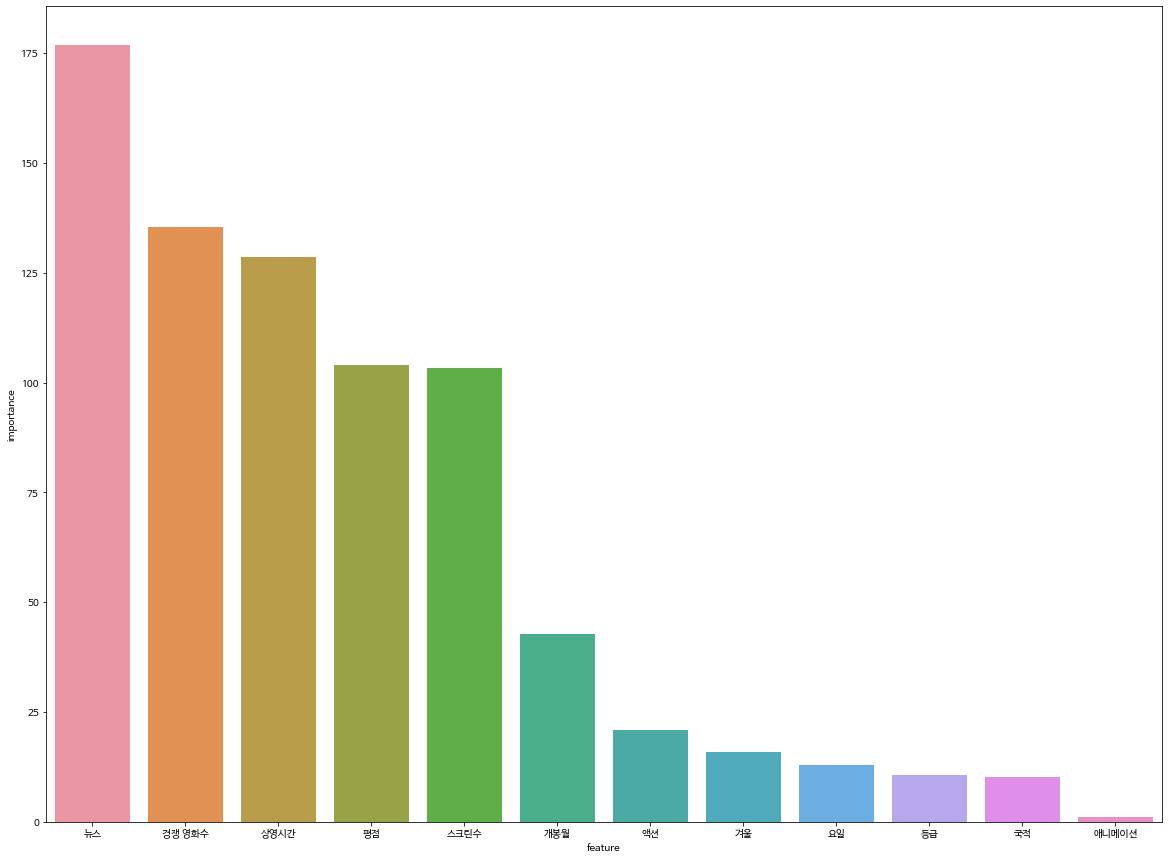

In [125]:
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:white')
sns.barplot(y='importance',x='feature', data=a)
plt.show()

In [126]:
## 샘플링 이후
import lightgbm as lgb
def get_oof_lgbm(params,train,train_data, test_data, target_data, num_round, early_round, verbose_round, N_SPLITS=5, random_state=0):

    FOLDs=KFold(n_splits=N_SPLITS, shuffle=True,random_state=0)

    oof = np.zeros(len(train_data))
    predictions = np.zeros(len(test_data))
    #predictions=[]

    features_lgb = list(train.columns)
    feature_importance_df = pd.DataFrame()

    for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train_data)):
        trn_data = lgb.Dataset(train_data[trn_idx], label=target_data[trn_idx])
        val_data = lgb.Dataset(train_data[val_idx], label=target_data[val_idx])

        print("LGB " + str(fold_) + "-" * 50)
        num_round = num_round
        clf = lgb.train(params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=verbose_round, 
                        early_stopping_rounds = early_round)
        oof[val_idx] = clf.predict(train_data[val_idx], num_iteration=clf.best_iteration)

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = features_lgb
        fold_importance_df["importance"] = clf.feature_importance()
        fold_importance_df["fold"] = fold_ + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        predictions += clf.predict(test_data, num_iteration=clf.best_iteration) / FOLDs.n_splits
        #predictions.append(clf.predict(test_data, num_iteration=clf.best_iteration))
    return oof, predictions, feature_importance_df,params

In [127]:
lgb_params={"objective":"binary",
           "metric":"auc",
           "alpha":0.08,
           "gamma":0.06,
           "eta":0.04,
           "silent":True}
a,b,c,d=get_oof_lgbm(lgb_params,X_train,X_resampled,X_test,y_resampled,num_round=100000, early_round=40, verbose_round=600, N_SPLITS=5, random_state=0)

predictions_lgbm2=b

LGB 0--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[82]	training's auc: 0.999962	valid_1's auc: 0.990842
LGB 1--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[108]	training's auc: 1	valid_1's auc: 0.990958
LGB 2--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[114]	training's auc: 1	valid_1's auc: 0.998167
LGB 3--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[104]	training's auc: 1	valid_1's auc: 0.996579
LGB 4--------------------------------------------------
Training until validation scores don't improve for 40 rounds.
Early stopping, best iteration is:
[32]	training's auc: 0.997787	valid_1

In [128]:

## train 예측
y_hat = np.where(a < 0.5, 0, 1)
metrics(y_resampled,y_hat)

정확도 : 0.97, 정밀도 : 0.98, 재현율 : 0.96
f1-score : 0.97, auc : 0.97


In [129]:
## test 예측
y_hat = np.where(b < 0.5, 0, 1)  
print("샘플링 이후")
metrics(y_test,y_hat)

샘플링 이후
정확도 : 0.94, 정밀도 : 0.96, 재현율 : 0.98
f1-score : 0.97, auc : 0.81


In [130]:
lgb_FI=c.sort_values(by=["fold", "importance"], ascending=[False, False]).groupby("fold").head(10)

In [131]:
a=lgb_FI.groupby("feature",as_index=False).mean().sort_values(by=["importance"],ascending=False)
a

,feature,importance,fold
4,뉴스,430.6,3.00
7,상영시간,320.4,3.00
2,경쟁 영화수,264.2,3.00
12,평점,260.8,3.00
8,스크린수,250.6,3.00
9,액션,176.0,3.00
0,개봉월,150.8,3.00
11,요일,125.0,2.00
5,드라마,113.5,2.50
6,등급,107.0,3.50


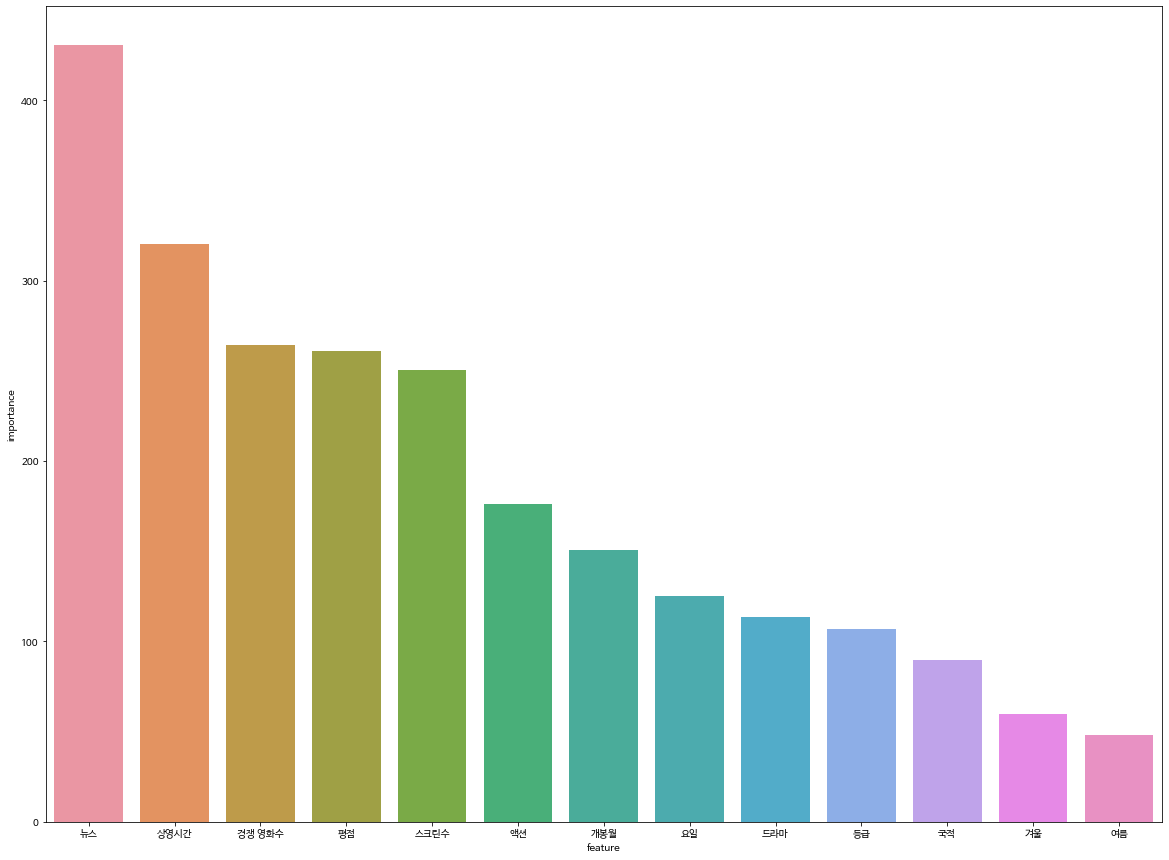

In [132]:
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:white')
sns.barplot(y='importance',x='feature', data=a)
plt.show()

In [133]:
from sklearn.metrics import confusion_matrix

cf1 = confusion_matrix(y_test, np.where(predictions_lgbm1 < 0.5, 0, 1))
cf = confusion_matrix(y_test, np.where(predictions_lgbm2 < 0.5, 0, 1))
print(cf1)
print("샘플링 이후")
print(cf)

[[  8   6]
 [  1 111]]
샘플링 이후
[[  9   5]
 [  2 110]]
